In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
import modelscripts
import planetengine

Fitted 1 variables to the figure.



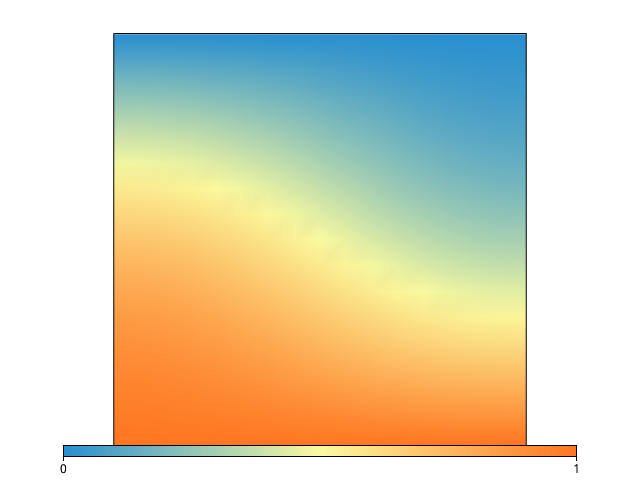

Fitted 1 variables to the figure.



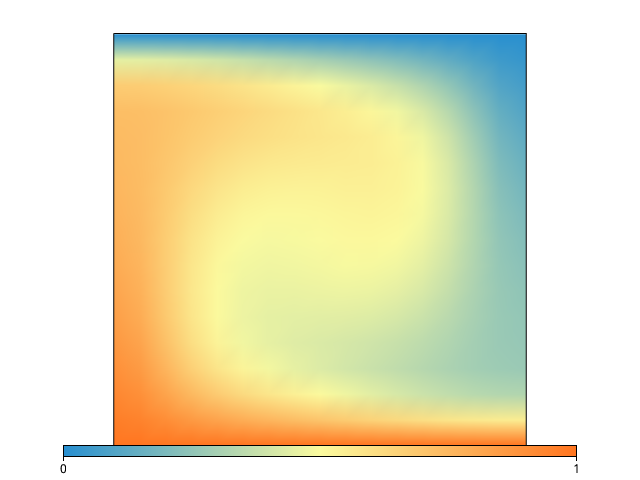

Mapping achieved at tolerance = 1e-05
Fitted 1 variables to the figure.



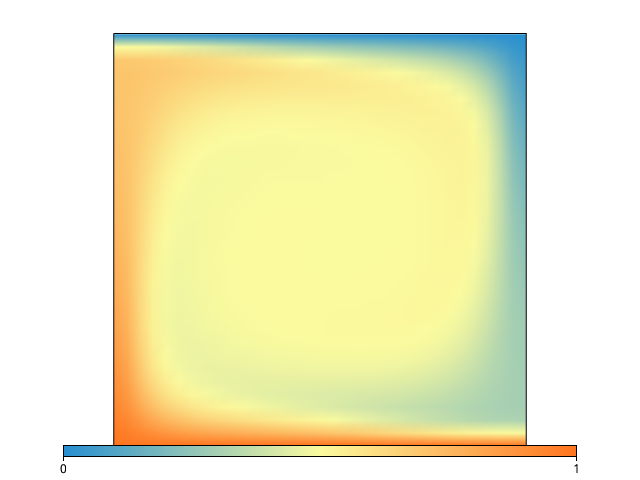

Mapping achieved at tolerance = 0.0
Fitted 1 variables to the figure.



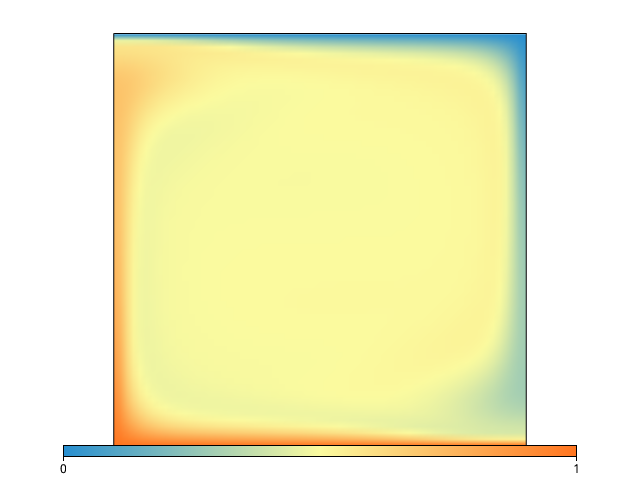

Mapping achieved at tolerance = 0.0
Fitted 1 variables to the figure.



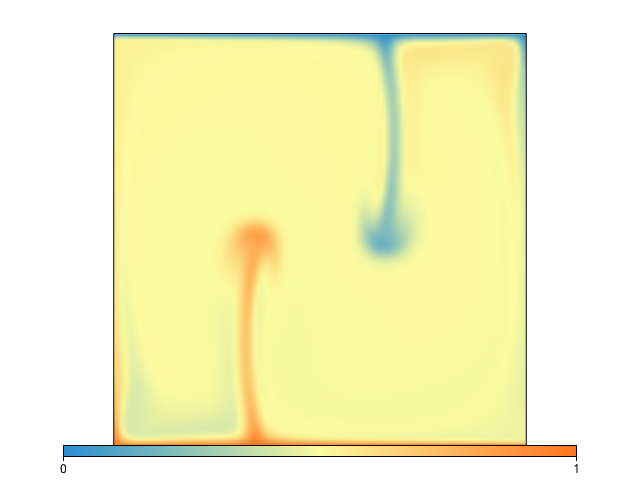

In [3]:
system = None
pre_system = None
for job in [(16, 1e4), (32, 1e5), (64, 1e6), (128, 1e7)]:
    res, Ra = job
    system = modelscripts.arrhenius.build(res = res, Ra = Ra, f = 1., eta0 = 1.)
    if pre_system is None:
        planetengine.initials.apply(
            {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
            system
            )
        planetengine.quickShow(system.temperatureField)
    else:
        planetengine.utilities.copyField(
            pre_system.temperatureField,
            system.temperatureField,
            scales = system.varScales['temperatureField'],
            boundaries = system.varBounds['temperatureField']
            )
    for i in range(1000):
        system.iterate()
    pre_system = system
    planetengine.quickShow(system.temperatureField)

Fitted 1 variables to the figure.



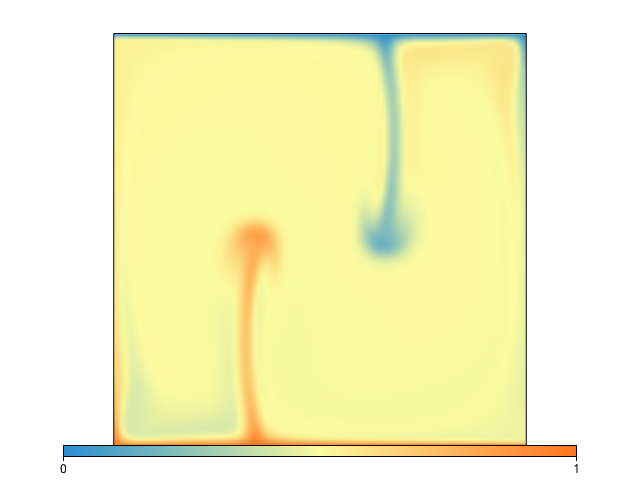

In [4]:
planetengine.quickShow(system.temperatureField)

In [5]:
basalGradInt = planetengine.analysis.Analyse.StandardIntegral(
    system.temperatureField,
    gradient = 'rad',
    surface = 'inner'
    )

Building integral...
Integral built.


In [6]:
basalGradInt.evaluate()

33.256563552443119

In [7]:
surfGradInt = planetengine.analysis.Analyse.StandardIntegral(
    system.temperatureField,
    gradient = 'rad',
    surface = 'outer'
    )

Building integral...
Integral built.


In [8]:
surfGradInt.evaluate()

33.255930906511594

No underlying change detected:                 skipping projection.
Fitted 2 variables to the figure.
No underlying change detected:                 skipping projection.



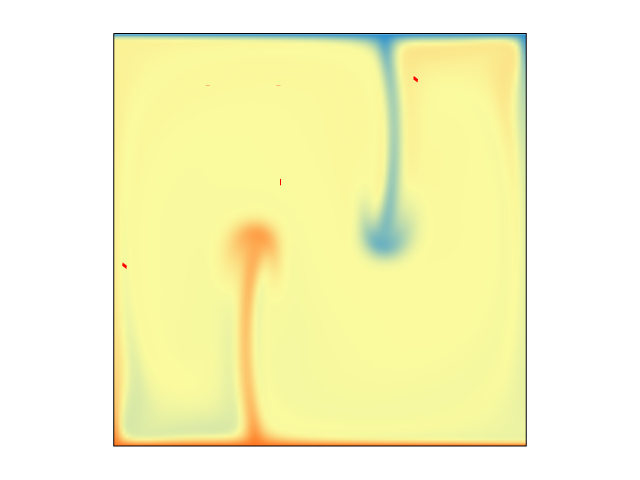

In [13]:
planetengine.quickShow(system.temperatureField, system.viscosityFn, colourBar = False)